In [1]:
print("Experimenting with EMG Data")

Experimenting with EMG Data


# Data Preprocessing

## Create CSV File from Data

### Step 1: Import Libraries

In [2]:
from pathlib import Path

import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Set the Path to master folder
Adjust this path to where you've saved the EMG data

In [3]:
master_folder = Path("EMG_data_for_gestures-master")

### Step 3: Iterate through subfolders and read each TXT file
Loop through each subfolder, read text files, and concatenate data.

In [4]:
all_data = []
file_count = 0

for i in range(1, 37):
    f_num = i
    subfolder = os.path.join(master_folder, str(f_num))
    if f_num < 10:
        subfolder = os.path.join(master_folder, "0" + str(f_num))

    for filename in os.listdir(subfolder):
        if filename.endswith(".txt"):
            filepath = os.path.join(subfolder, filename)
            data = pd.read_csv(filepath, delim_whitespace=True)
            data = data[data["class"] != 0]
            all_data.append(data)

### Step 4: Concatenate all data and save to CSV
Concatenate all data into single DataFrame and save as CSV file

In [5]:
combined_data = pd.concat(all_data, ignore_index=True)
combined_data.to_csv("EMG_gestures_data.csv", index=False)

## Preprocess Data

In [6]:
combined_data.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,2400,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1.0
1,2401,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0
2,2402,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0
3,2403,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0
4,2404,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0


In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512751 entries, 0 to 1512750
Data columns (total 10 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   time      1512751 non-null  int64  
 1   channel1  1512751 non-null  float64
 2   channel2  1512751 non-null  float64
 3   channel3  1512751 non-null  float64
 4   channel4  1512751 non-null  float64
 5   channel5  1512751 non-null  float64
 6   channel6  1512751 non-null  float64
 7   channel7  1512751 non-null  float64
 8   channel8  1512751 non-null  float64
 9   class     1512750 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 115.4 MB


In [8]:
combined_data.shape

(1512751, 10)

In [9]:
combined_data["class"].value_counts()

class
6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
7.0     13696
Name: count, dtype: int64

In [10]:
features = combined_data.drop(columns=["class", "time"])
features.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001
1,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
3,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
4,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002


In [11]:
classes = combined_data["class"]
classes.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., nan])

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'channel1'}>,
        <Axes: title={'center': 'channel2'}>],
       [<Axes: title={'center': 'channel3'}>,
        <Axes: title={'center': 'channel4'}>,
        <Axes: title={'center': 'channel5'}>],
       [<Axes: title={'center': 'channel6'}>,
        <Axes: title={'center': 'channel7'}>,
        <Axes: title={'center': 'channel8'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

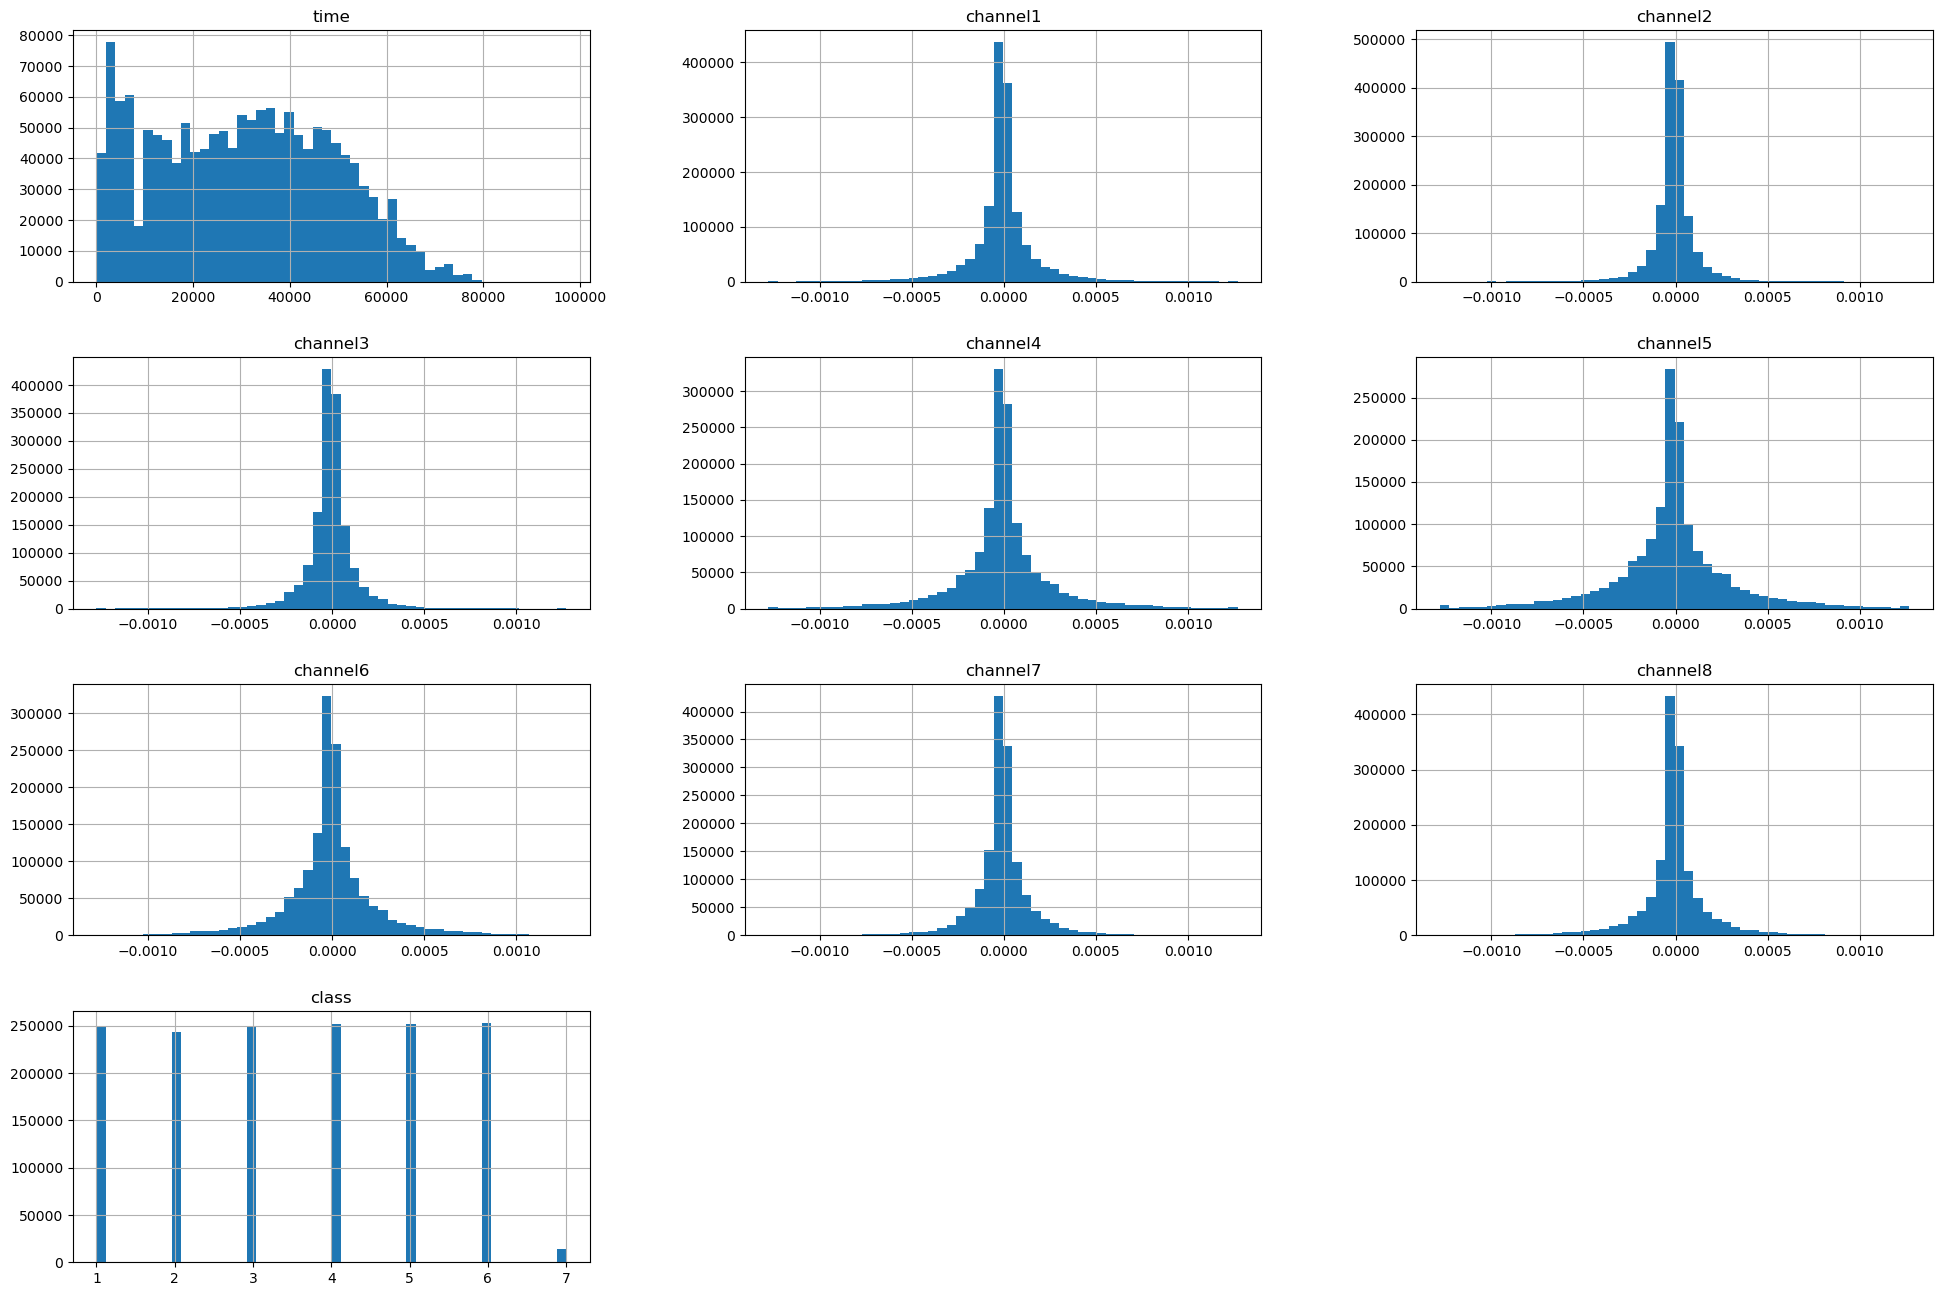

In [12]:
combined_data.hist(bins=50, figsize=(24,16))

In [13]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [14]:
# Feature Extraction

# Mean Absolute Value (MAV): Gives the average signal magnitude, often reflecting muscle activation
features["MAV"] = np.mean(np.abs(normalized_features), axis=1)

# Root Mean Square (RMS): Commonly used to quantify signal strength
features["RMS"] = np.sqrt(np.mean(normalized_features**2, axis=1))

# Standard Deviation (SD): Captures signal variability
features["SD"] = np.std(normalized_features, axis=1)

In [15]:
# Removing Rows with NaN:
classes = classes.dropna()
features = features.loc[classes.index] # Keep features aligned

In [16]:
features.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,MAV,RMS,SD
0,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,0.036084,0.050521,0.03852
1,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,0.044297,0.057896,0.05502
2,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,0.044297,0.057896,0.05502
3,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,0.044297,0.057896,0.05502
4,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,0.044297,0.057896,0.05502


# Creating Train Set & Test Set Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features[["MAV", "RMS", "SD"]], classes, test_size=0.2, random_state=42
)

# Note to self: features (input data) and classes (output labels) are paired by rows

# Training Models

## Logistic Regression

In [18]:
# Import and train the model
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=500)

# Train the model on training data
lr_model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=500, random_state=42)

## Random Forest

In [18]:
# Import and train the model
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model on training data
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

# Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## Logistic Regression

In [22]:
lr_y_pred = lr_model.predict(X_test)

In [23]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.6360068996274106


In [24]:
# Generate report as dict
lr_report = classification_report(y_test, lr_y_pred, output_dict=True, zero_division=1)

# Convert report to DF
lr_report_df = pd.DataFrame(lr_report).transpose()

# Display styled report
lr_report_df.style.format("{:.2f}").set_caption("Classification Report")

,precision,recall,f1-score,support
0.0,0.64,0.98,0.78,544916.00
1.0,1.00,0.00,0.00,50043.00
2.0,0.25,0.06,0.09,48692.00
3.0,0.18,0.00,0.00,49972.00
4.0,0.09,0.01,0.01,50243.00
5.0,1.00,0.00,0.00,50202.00
6.0,1.00,0.00,0.00,50780.00
7.0,1.00,0.00,0.00,2734.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.65,0.13,0.11,847582.00


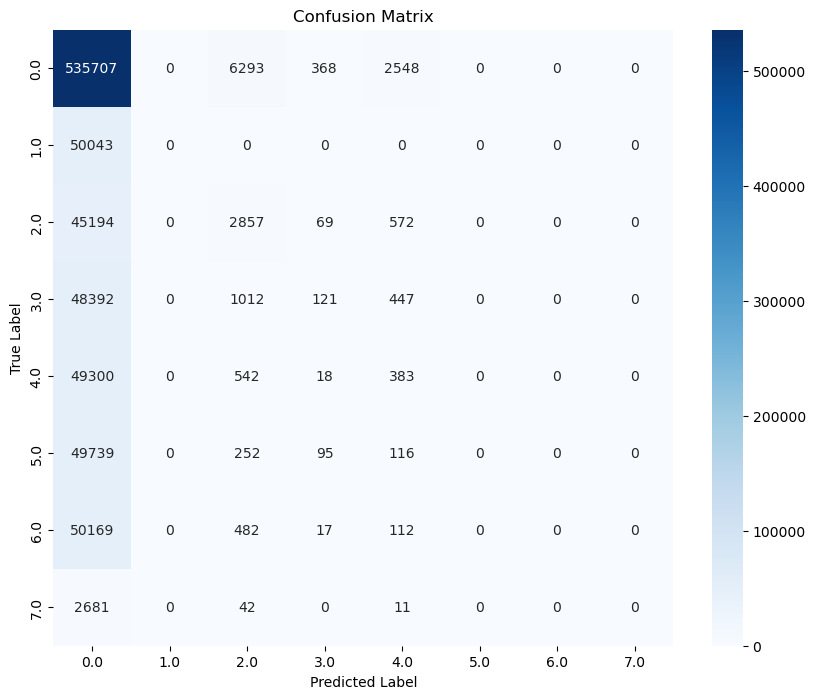

In [25]:
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes.unique(), yticklabels=classes.unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Random Forest

In [20]:
rf_y_pred = rf_model.predict(X_test)

In [21]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9747149231531979


In [22]:
# Generate report as dict
rf_report = classification_report(y_test, rf_y_pred, output_dict=True, zero_division=1)

# Convert report to DF
rf_report_df = pd.DataFrame(rf_report).transpose()

# Display styled report
rf_report_df.style.format("{:.2f}").set_caption("Classification Report")

,precision,recall,f1-score,support
1.0,0.99,1.00,0.99,49836.00
2.0,0.97,0.97,0.97,48761.00
3.0,0.97,0.97,0.97,49992.00
4.0,0.97,0.97,0.97,50221.00
5.0,0.97,0.97,0.97,50327.00
6.0,0.97,0.97,0.97,50657.00
7.0,0.99,0.96,0.98,2756.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.98,0.97,0.97,302550.00
weighted avg,0.97,0.97,0.97,302550.00


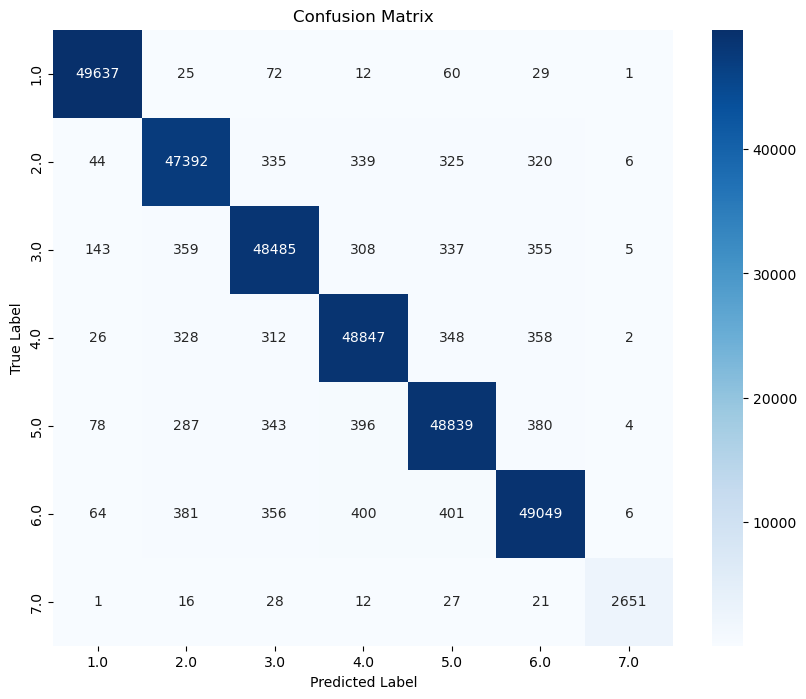

In [23]:
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes.unique(), yticklabels=classes.unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()